<strong>Для функциональной последовательности $x_n(t)$ и функции $x(t)$ проверить
наличие равномерной и среднеквадратичной сходимости $x_n \to x$ на промежутке $[a;b]$. Проиллюстрировать выводы графически (для построения графиков можно использовать математические пакеты). <font color='red'>(3 балла за каждый пункт)</font></strong>

a) $x_n(t) = \frac{nt\sqrt{t}}{exp(nt^2)}, x(t) = 0, [a; b] = [0; 3]$

Как указано в §3 конспекта лекций, под равномерной сходимостью понимают сходимость в пространстве $C[a;b]$. Среднеквадратичной сходимостью называют сходимость в пространстве $L^2(a; b)$.Причем равномерная сходимость – более сильное свойство, чем среднеквадратиtчная, иными словами, при наличии равномерной сходимости имеется и среднеквадратичная: 
$x_n \to x$ в $C[a; b] \Rightarrow x_n \to x$ в $L^2(a; b)$

Если равномерной сходимости нет, то может быть более слабая – среднеквадратичная. Для данных задачи проверим сначала, имеется ли равномерная сходимость. Вычислим
расстояние между функциями $x_n(t)$ и $x(t) = 0$ в пространстве $C[0; 3]$:
$$\rho_{C[0;3]}(x_n, 0) = \max_{t \in [0; 3]}|x_n(t) - 0| = \max_{t \in [0; 3]}(\frac{nt\sqrt{t}}{exp(nt^2)})$$

Найдем наибольшее значение функции $\varphi = \frac{nt\sqrt{t}}{exp(nt^2)}$ на отрезке $[0; 3]$. Как известно,
наибольшее значение непрерывной функции следует искать среди ее значений на концах отрезка и локальных экстремумов внутри отрезка.

Вычисляем $\varphi^{'}(t)$:

In [1]:
from sympy import *
from IPython.display import *

init_printing(use_latex='mathjax')
n = Symbol('n')
t = Symbol('t')
varphi = ((n*t*sqrt(t))/(exp(n*t**2)))
diffed_varphi = simplify(diff(varphi, t))

display(diffed_varphi)

                         2
     ⎛       2    ⎞  -n⋅t 
n⋅√t⋅⎝- 4⋅n⋅t  + 3⎠⋅ℯ     
──────────────────────────
            2             

Из условия $\varphi^{'}(t) = 0, t \in (0; 3)$, находим точку, в которой может быть локальный экстремум.

In [2]:
solve(diffed_varphi, t)

⎡           ___          ___⎤
⎢          ╱ 1          ╱ 1 ⎥
⎢   -√3⋅  ╱  ─    √3⋅  ╱  ─ ⎥
⎢       ╲╱   n       ╲╱   n ⎥
⎢0, ────────────, ──────────⎥
⎣        2            2     ⎦

Отсюда получаем, что $t_0 = \sqrt{\frac{3}{4n}}$.

Сравним значения функции $\varphi$ в точке $t_0$ и на концах отрезка:

In [3]:
varphi_0 = varphi.subs(t, 0)
varphi_1 = varphi.subs(t, 3)
varphi_2 = varphi.subs(t, sqrt(3/(4*n)))

display(simplify(varphi_0))
display(simplify(varphi_1))
display(simplify(varphi_2)) 

0

        -9⋅n
3⋅√3⋅n⋅ℯ    

             3/4      
    3/4   ⎛1⎞     -3/4
√2⋅3   ⋅n⋅⎜─⎟   ⋅ℯ    
          ⎝n⎠         
──────────────────────
          4           

Заметим, что при любых положительных значениях $n$: $\varphi(t_0)$ - наибольшее значение функции $\varphi$ на отрезке $[0; 3]$.

Возвращаемся к вычислению расстояния между функциями $x_n(t)$ и $x(t) = 0$.

$\rho_{C[0;3]}(x_n, 0) = \max_{t \in [0; 3]}(\frac{nt\sqrt{t}}{exp(nt^2)}) = \frac{\sqrt{2} \cdot 3^{\frac{3}{4}} n}{4 e^{\frac{3}{4}}} \left(\frac{1}{n}\right)^{\frac{3}{4}} \to \infty$ при $n \to \infty$.

Действительно, рассмотрим предел:

In [4]:
limit(varphi_2, n, oo)

∞

Таким образом, доказано, что $x_n \nrightarrow x$ в пространстве $C[0; 3]$.

Теперь проверим, имеется ли среднеквадратичная сходимость.

$$\rho_{L^2(0;3)}(x_n, 0) = \sqrt{\int_0^3{(\mathrm{\frac{nt\sqrt{t}}{exp(nt^2)}})}^2\,\mathrm{d}t}$$

In [5]:
varphi_sqr = varphi**2
# rho = integrate(varphi_sqr, (t, 0, 3))
# display(sqrt(rho))
display(varphi_sqr)

             2
 2  3  -2⋅n⋅t 
n ⋅t ⋅ℯ       

Так как sympy в текущей версии не может посчитать данный интеграл, то обращусь к Matlab R2017b:
![Первый скрин](../../files/module1/matlab1.png)

Так как $\sqrt{\int_0^3{(\mathrm{\frac{nt\sqrt{t}}{exp(nt^2)}})}^2\,\mathrm{d}t} \nrightarrow 0$ при $n \to \infty$, то и нет среднеквадратичной сходимости.

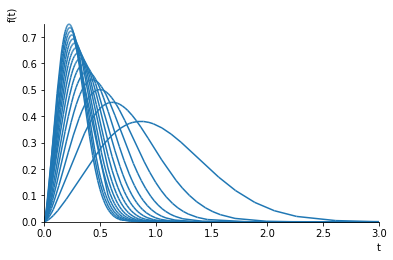

In [6]:
plot(varphi.subs(n, 1), varphi.subs(n, 2), varphi.subs(n, 3),
     varphi.subs(n, 4), varphi.subs(n, 5), varphi.subs(n, 6),
     varphi.subs(n, 7), varphi.subs(n, 8), varphi.subs(n, 9),
     varphi.subs(n, 10), varphi.subs(n, 11), varphi.subs(n, 12),
     varphi.subs(n, 13), varphi.subs(n, 14), varphi.subs(n, 15),
     xlim=(0, 3))

Как видно из рисунка, $x_n \rightarrow x$ в пространстве $L^2(0; 3)$. 

b) $x_n = \frac{n t \left(n t + 1\right)}{n^{2} t^{2} + 1}, x(t) = 1, [a; b] = [\frac{1}{2}; 4]$

Как указано в §3 конспекта лекций, под равномерной сходимостью понимают сходимость в пространстве $C[a;b]$. Среднеквадратичной сходимостью называют сходимость в пространстве $L^2(a; b)$.Причем равномерная сходимость – более сильное свойство, чем среднеквадратиtчная, иными словами, при наличии равномерной сходимости имеется и среднеквадратичная: 
$x_n \to x$ в $C[a; b] \Rightarrow x_n \to x$ в $L^2(a; b)$

Если равномерной сходимости нет, то может быть более слабая – среднеквадратичная. Для данных задачи проверим сначала, имеется ли равномерная сходимость. Вычислим
расстояние между функциями $x_n(t)$ и $x(t) = 0$ в пространстве $C[\frac{1}{2}; 4]$:
$$\rho_{C[\frac{1}{2}; 4]}(x_n, 1) = \max_{t \in [\frac{1}{2}; 4]}|x_n(t) - 1| = \max_{t \in [\frac{1}{2}; 4]}(\frac{n t - 1}{n^{2} t^{2} + 1})$$

Найдем наибольшее значение функции $\varphi = \frac{n t - 1}{n^{2} t^{2} + 1}$ на отрезке $[0; 3]$. Как известно,
наибольшее значение непрерывной функции следует искать среди ее значений на концах отрезка и локальных экстремумов внутри отрезка.

Вычисляем $\varphi^{'}(t)$:

In [7]:
varphi = simplify((n*t*(1 + n*t))/(1 + n**2*t**2) - 1)
diffed_varphi = simplify(diff(varphi, t))

display(diffed_varphi)

  ⎛ 2  2                      ⎞
n⋅⎝n ⋅t  - 2⋅n⋅t⋅(n⋅t - 1) + 1⎠
───────────────────────────────
                     2         
          ⎛ 2  2    ⎞          
          ⎝n ⋅t  + 1⎠          

Из условия $\varphi^{'}(t) = 0, t \in (\frac{1}{2}; 4)$, находим точку, в которой может быть локальный экстремум.

In [8]:
solve(diffed_varphi, t)

⎡1 + √2  -√2 + 1⎤
⎢──────, ───────⎥
⎣  n        n   ⎦

Отсюда получаем, что $t_0 = \frac{1}{n} \left(1 + \sqrt{2}\right)$.

Сравним значения функции $\varphi$ в точке $t_0$ и на концах отрезка:

In [9]:
varphi_0 = varphi.subs(t, Rational(1, 2))
varphi_1 = varphi.subs(t, 4)
varphi_2 = varphi.subs(t, (1 + sqrt(2))/n)

display(simplify(varphi_0))
display(simplify(varphi_1))
display(simplify(varphi_2)) 

2⋅(n - 2)
─────────
   2     
  n  + 4 

 4⋅n - 1 
─────────
    2    
16⋅n  + 1

  1   √2
- ─ + ──
  2   2 

In [10]:
limit(varphi_0, n, oo)

0

In [11]:
varphi_sqr = (varphi - 1)**2
# integrate(varphi_sqr, (t, Rational(1, 2), 4))
display(varphi_sqr)

               2
⎛ n⋅t - 1     ⎞ 
⎜───────── - 1⎟ 
⎜ 2  2        ⎟ 
⎝n ⋅t  + 1    ⎠ 

Так как sympy в текущей версии не может посчитать данный интеграл, то обрачусь к Matlab R2017b:
![Второй скрин](../../files/module1/matlab2.png)

Следовательно, имеется среднеквадратичная сходимость.

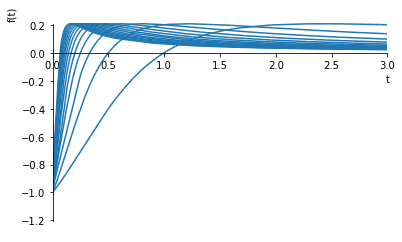

In [12]:
plot(varphi.subs(n, 1), varphi.subs(n, 2), varphi.subs(n, 3),
     varphi.subs(n, 4), varphi.subs(n, 5), varphi.subs(n, 6),
     varphi.subs(n, 7), varphi.subs(n, 8), varphi.subs(n, 9),
     varphi.subs(n, 10), varphi.subs(n, 11), varphi.subs(n, 12),
     varphi.subs(n, 13), varphi.subs(n, 14), varphi.subs(n, 15),
     xlim=(0, 3))